In [21]:
!pip install opencv-python numpy



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install mediapipe


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


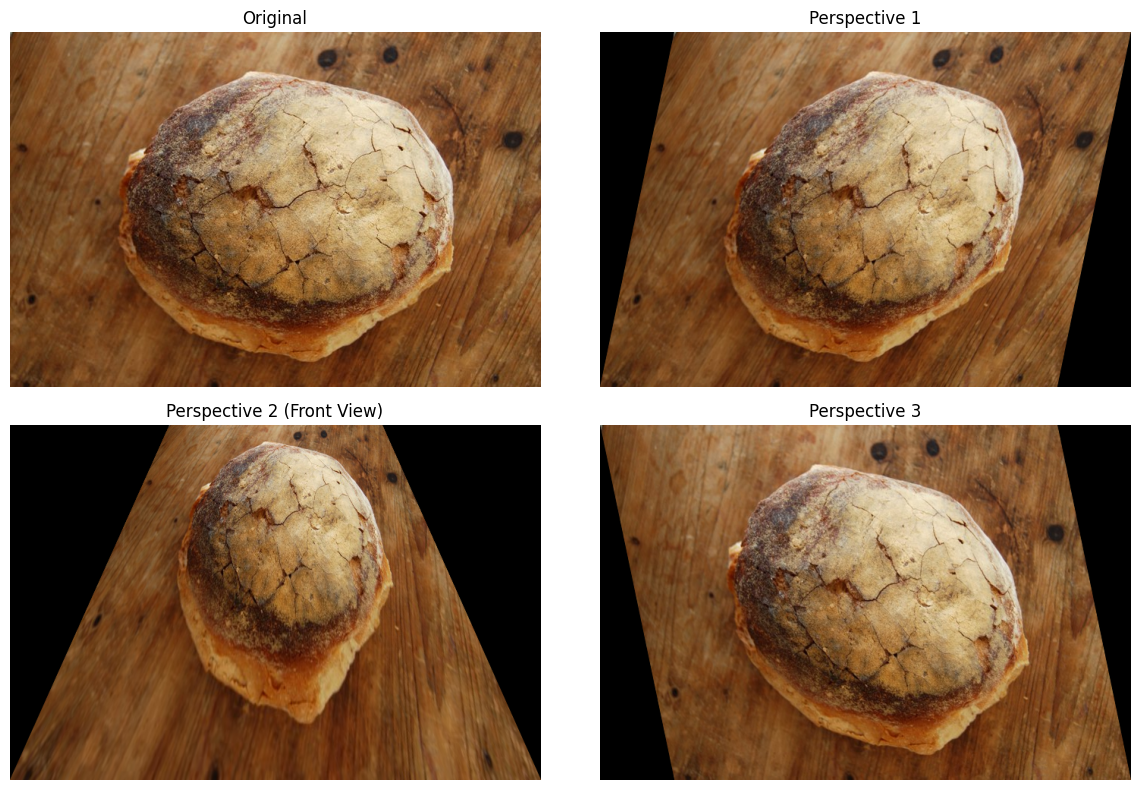

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("maltese_loaf.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

# Define source points (corners of image)
src_pts = np.float32([
    [0, 0],                  # Top-left
    [width - 1, 0],          # Top-right
    [0, height - 1],         # Bottom-left
    [width - 1, height - 1]  # Bottom-right
])

# Perspective 1: Tilt from the Left
dst_pts1 = np.float32([
    [width * 0.14, 0],        # Top-left moved inward
    [width - 1, 0],           # Top-right unchanged
    [0, height - 1],          # Bottom-left unchanged
    [width * 0.86, height - 1]  # Bottom-right moved inward
])

# Perspective 2: Front View
dst_pts2 = np.float32([
    [width * 0.3, 0],        # Top-left squashed inward
    [width * 0.7, 0],        # Top-right squashed inward
    [0, height - 1],         # Bottom-left
    [width - 1, height - 1]  # Bottom-right
])

# Perspective 3: Skew to the Right
dst_pts3 = np.float32([
    [0, 0],                   # Top-left
    [width * 0.86, 0],        # Top-right shifted left
    [width * 0.14, height - 1],  # Bottom-left shifted right
    [width - 1, height - 1]   # Bottom-right
])

# Get transformation matrices
M1 = cv2.getPerspectiveTransform(src_pts, dst_pts1)
M2 = cv2.getPerspectiveTransform(src_pts, dst_pts2)
M3 = cv2.getPerspectiveTransform(src_pts, dst_pts3)

# Apply warps
warp1 = cv2.warpPerspective(image, M1, (width, height))
warp2 = cv2.warpPerspective(image, M2, (width, height))
warp3 = cv2.warpPerspective(image, M3, (width, height))

# Plot the results
titles = ["Original", "Perspective 1", "Perspective 2 (Front View)", "Perspective 3"]
images = [image, warp1, warp2, warp3]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
